In [2]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File('lms_fun_v3.hdf5','r') 
list(f.keys())
#list(f1.keys())

['matched_10_v',
 'matched_10_x',
 'matched_10_y',
 'matched_10_z',
 'matched_3_v',
 'matched_3_x',
 'matched_3_y',
 'matched_3_z',
 'mismatched_v',
 'mismatched_x',
 'mismatched_y',
 'timevarying_coefficents',
 'timevarying_v',
 'timevarying_x',
 'timevarying_y',
 'timevarying_z']

In [3]:
matched_10_x=f['matched_10_x']
matched_10_z=f['matched_10_z']
matched_3_x=f['matched_3_x']
matched_3_z=f['matched_3_z']
m10_x=np.array(matched_10_x)
m10_z=np.array(matched_10_z)
m3_x=np.array(matched_3_x)
m3_z=np.array(matched_3_z)

In [4]:
# input denmension is 501, means 501 features of data each
# senquence of data is 600, means there are 600 data inall

In [5]:
def LMS(w_init,x,y):
    n_iter=x.shape[0]  #600 iteration
    n_node=x.shape[1]  #501 nodes
    w_last=w_init
    w_update=np.zeros((n_node,3),float)  #501*3 w ,first is w_init
    error_meansqr=np.zeros((n_node,1),float) # 501
    errsqr=np.zeros((n_iter,n_node),float) # 501 error square in each sample, all 600 sample, 600*501
    err=np.zeros((n_iter,n_node)) # 501 error in each sample, 600 sample, 600*501
    for i in range(0,n_iter):
        for j in range(0,n_node):
            if j==0:
                err[i,j]=y[i,j]-w_init[i][j,0]*x[i,j]
            elif j==1:
                err[i,j]=y[i,j]-w_last[i][j,0]*x[i,j]-w_last[i][j,1]*x[i,j-1]
            else:
                err[i,j]=y[i,j]-w_last[i][j,0]*x[i,j]-w_last[i][j,1]*x[i,j-1]-w_last[i][j,2]*x[i,j-2]
            delta=np.array([x[i,j],x[i,j-1],x[i,j-2]])
            if j<n_node-1:
                w_last[i][j+1,:]=w_last[i][j,:]+ eta * err[i,j] * delta.transpose()
           # w_last=w_update
            errsqr[i,j]=err[i,j]*err[i,j]
    error_meansqr=errsqr.mean(axis=0)
    return w_update,error_meansqr,errsqr

In [6]:
input_dim = m3_z.shape[1]
input_iter = m3_z.shape[0]
#w_init = np.random.randn(input_dim ,3)/ np.sqrt(input_dim)
w_init=np.zeros((input_iter,input_dim,3),float)

Text(0.5, 1.0, 'MSE with 3dB matched data (eta=0.2)')

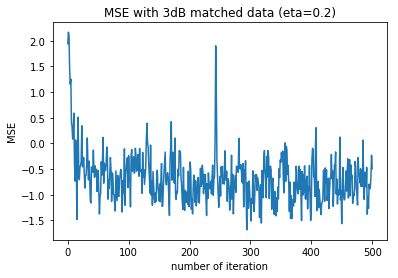

In [26]:
eta=0.2
w=LMS(w_init,m3_x,m3_z)
mse_3_15=10*np.log10(w[1])
#print( w[0].shape)
plt.plot(mse_3_15)
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 3dB matched data (eta=0.2)')


Text(0.5, 1.0, 'MSE with 10dB matched data (eta=0.15)')

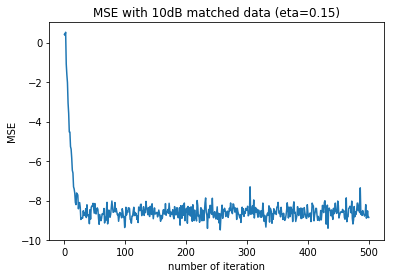

In [17]:
eta=0.15
w=LMS(w_init,m10_x,m10_z)
mse_10_15=10*np.log10(w[1])
#print( w[0].shape)
plt.plot(mse_10_15)
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 10dB matched data (eta=0.15)')

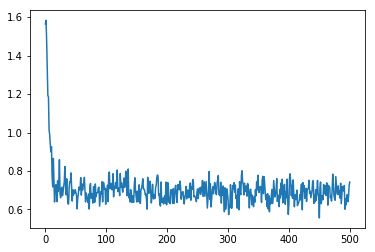

In [8]:
plt.plot(w[1])

Text(0.5, 1.0, 'MSE with 3dB matched data (eta=0.05)')

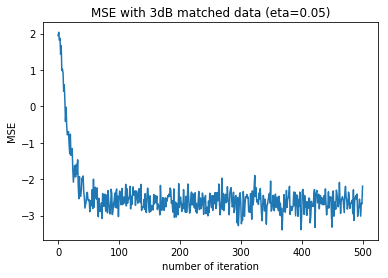

In [9]:
eta=0.05
w=LMS(w_init,m3_x,m3_z)
mse_3_5=10*np.log10(w[1])
#print( w[0].shape)
plt.plot(mse_3_5)
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 3dB matched data (eta=0.05)')

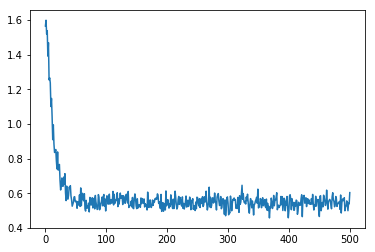

In [10]:
plt.plot(w[1])

Text(0.5, 1.0, 'MSE with 10dB matched data (eta=0.23)')

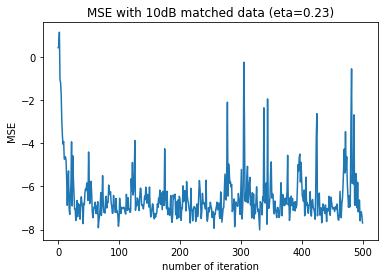

In [20]:
eta=0.23
w=LMS(w_init,m10_x,m10_z)
mse_10_5=10*np.log10(w[1])
#print( w[0].shape)
plt.plot(mse_10_5)
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with 10dB matched data (eta=0.23)')

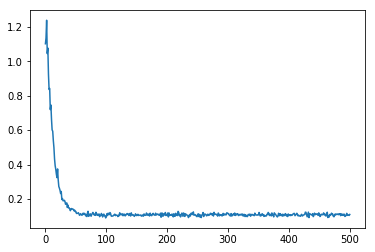

In [12]:
plt.plot(w[1])


Text(0.5, 1.0, 'MSE comparasion')

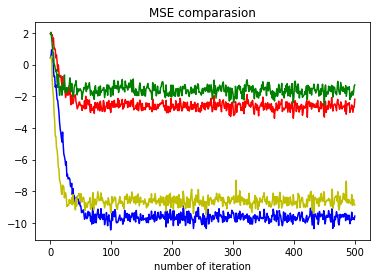

In [20]:
plt.plot(mse_3_5,'r',mse_10_5,'b',mse_3_15,'g',mse_10_15,'y')
plt.xlabel('number of iteration')
#plt.legend(mse_3_5,mse_3_15)
plt.title('MSE comparasion')


Text(0.5, 1.0, 'MSE in eta=0.33 and 0.34 with 10dB')

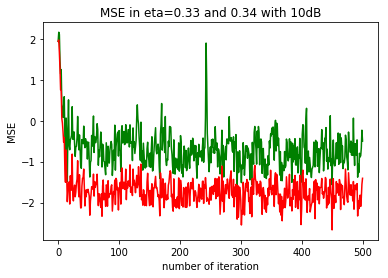

In [28]:
eta=0.2
w=LMS(w_init,m3_x,m3_z)
mse_4=10*np.log10(w[1])
eta=0.14
w=LMS(w_init,m3_x,m3_z)
mse_33=10*np.log10(w[1])
plt.plot(mse_4,'g')
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.plot(mse_33,'r')
plt.title('MSE in eta=0.33 and 0.34 with 10dB')

In [29]:
## P3.4 above##

In [30]:
mis_x=f['mismatched_x']
mis_y=f['mismatched_y']
mis_x=np.array(mis_x)
mis_y=np.array(mis_y)

Text(0.5, 1.0, 'MSE with mismatched data (eta=0.05)')

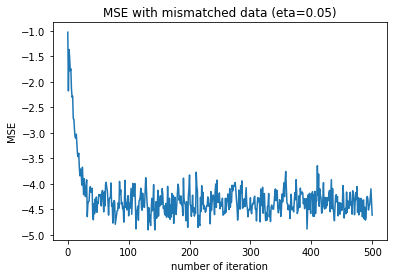

In [35]:
input_dim = mis_x.shape[1]
input_iter = mis_x.shape[0]
#w_init = np.random.randn(input_dim ,3)/ np.sqrt(input_dim)
w_init=np.zeros((input_iter,input_dim,3),float)

eta=0.05
w=LMS(w_init,mis_x,mis_y)
#mse_mean=w[1][200:500,0].mean(axis=0)
mse=10*np.log10(w[1])
#print( w[0].shape)
plt.plot(mse)
plt.ylabel('MSE')
plt.xlabel('number of iteration')
plt.title('MSE with mismatched data (eta=0.05)')


In [25]:
mse=w[1][200:500]
mse_mean=mse.mean()
print(mse_mean)

0.36647978508798407


In [26]:
## to compute Rvn
(n_iter,n_node)=mis_x.shape
Rv=np.zeros((n_iter,3,3),float)
for i in range (0,n_iter):
    Rv[i][0,0]=sum(mis_x[i,:]*mis_x[i,:])/n_node
    Rv[i][0,1]=sum(mis_x[i,0:n_node-2]*mis_x[i,1:n_node-1])/(n_node-1)
    Rv[i][0,2]=sum(mis_x[i,0:n_node-3]*mis_x[i,2:n_node-1])/(n_node-2)
    Rv[i][1,0]=Rv[i][0,1]
    Rv[i][1,1]=sum(mis_x[i,0:n_node-2]*mis_x[i,0:n_node-2])/(n_node-1)
    Rv[i][1,2]=sum(mis_x[i,0:n_node-3]*mis_x[i,1:n_node-2])/(n_node-1)
    Rv[i][2,0]=Rv[i][0,2]
    Rv[i][2,1]=Rv[i][1,2]
    Rv[i][2,2]=sum(mis_x[i,0:n_node-3]*mis_x[i,0:n_node-3])/(n_node-2)
#print(Rv[2])
Rv_av=Rv.mean(axis=0)
print(Rv_av)

[[ 1.00045756e+00 -6.56615505e-04  1.91132495e-03]
 [-6.56615505e-04  9.98777566e-01 -6.66812223e-04]
 [ 1.91132495e-03 -6.66812223e-04  9.98715046e-01]]


In [27]:
## to compute rn
rn=np.zeros((n_iter,3),float)
for i in range (0,n_iter):
    rn[i,0]=sum(mis_x[i,:]*mis_y[i,:])/n_node
    rn[i,1]=sum(mis_x[i,0:n_node-2]*mis_y[i,1:n_node-1])/(n_node-1)
    rn[i,2]=sum(mis_x[i,0:n_node-3]*mis_y[i,2:n_node-1])/(n_node-2)
rn_av=rn.mean(axis=0)
print(rn_av)

[0.401296   0.38671977 0.37086137]


In [28]:
## to compute LLSE
y_head=np.zeros((n_iter,n_node),float)
for i in range (0,n_iter):
    for j in range (0,n_node):
        if j==0:
            y_head[i,j]= rn_av[0]*mis_x[i,j]
        elif j==1:
            y_head[i,j]=rn_av[0]*mis_x[i,j]+rn_av[1]*mis_x[i,j-1]
        else:
            y_head[i,j]=rn_av[0]*mis_x[i,j]+rn_av[1]*mis_x[i,j-1]+rn_av[2]*mis_x[i,j-2]
err=mis_y-y_head
errsqr=err*err
LLSE=errsqr.mean()
print(LLSE)
#print(errsqr)

0.33111445282479707
